# Pandas Data Concat

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Example 1

1. Create sample datasets of job postings in Jan and Feb.

In [2]:
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [3]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


--> Concat function is able to append both columns (axis=0, default) and rows (axis=1), however we will only use this function to append rows because merge function is more cut out for appending columns

2. Use "concat" function to append rows of those two dataframes  

In [8]:
union_df = pd.concat([job_postings_jan,job_postings_feb])
union_df

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


--> set "ignore_index" param to **True** to reset the index of the unionized table

In [7]:
union_df = pd.concat([job_postings_jan,job_postings_feb], ignore_index= True)
union_df

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


### Example 2

1. Create a column for month

In [18]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b') 
# '%B' returns full month name, '%b' returns abbreviated month name (Jan)

2. Create a dict storing dataframe of each month

In [20]:

# get the unique values in the month column
months = df['job_posted_month'].unique()

# use dict comprehesion to create a dict of a key-value pair month:df for each month
month_dict = {month: df[df['job_posted_month'] == month] for month in months}

# type(month_dict)
month_dict['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


3. Concatenate the first quarter

In [22]:
quarter_1 = [month_dict['Jan'],month_dict['Feb'],month_dict['Mar']]
df_q1 = pd.concat(quarter_1,ignore_index= True)
df_q1


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


4. Create a plot to inspect the data

<Axes: xlabel='job_posted_month'>

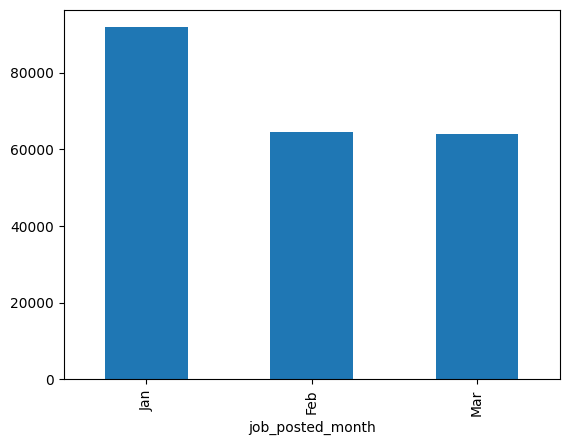

In [25]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

5. Exercise Section

Ex1: Concat Monthly Postings

In [6]:
df1 = df.copy()

df1['job_posted_month'] = df1['job_posted_date'].dt.strftime('%b')

month_names = df1['job_posted_month'].unique()

dict_months = {month: df1[df1['job_posted_month'] == month] for month in month_names}

df_q2 = [dict_months['Mar'],dict_months['Apr'],dict_months['May']]

pd.concat(df_q2,ignore_index=True) # index = True is equal to regenerating new index column for the concat table

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",Mar
1,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,Mar
2,Senior Data Engineer,Senior Data Engineer (Work from home Eligible),"Wilmington, DE",via WDHN Jobs,Full-time,False,"Texas, United States",2023-03-29 13:32:03,False,True,United States,None,NaN,NaN,Capital One,"['scala', 'python', 'nosql', 'mongo', 'shell',...","{'cloud': ['redshift', 'snowflake', 'aws', 'az...",Mar
3,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,None,NaN,NaN,MCKESSON,"['python', 'azure', 'databricks', 'pyspark', '...","{'cloud': ['azure', 'databricks'], 'libraries'...",Mar
4,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179102,Data Scientist,"Data Scientist, Advanced Motor Technology","Newark, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-30 06:02:25,False,True,United States,None,NaN,NaN,Lucid Motors,"['go', 'python', 'sql', 'matlab', 'numpy', 'pa...","{'libraries': ['numpy', 'pandas', 'scikit-lear...",May
179103,Machine Learning Engineer,Data Scientist/Machine Learning Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-05-26 06:47:23,False,False,Czechia,None,NaN,NaN,StartupJobs,"['python', 'azure']","{'cloud': ['azure'], 'programming': ['python']}",May
179104,Software Engineer,New Product Analyst,Hong Kong,via Trabajo.org,Full-time,False,Hong Kong,2023-05-08 06:35:27,True,False,Hong Kong,None,NaN,NaN,ALD Automotive France,None,None,May
179105,Software Engineer,Software Engineer Level 3,"Gothenburg, Sweden",via Trabajo.org,Full-time,False,Sweden,2023-05-03 06:30:34,False,False,Sweden,None,NaN,NaN,Dabster Systems,"['c++', 'aws']","{'cloud': ['aws'], 'programming': ['c++']}",May


Ex2: Concat Job Postings

In [10]:
df2 = df.copy()

job_titles = df['job_title_short'].unique()

dict_job_titles = {job: df2[df2['job_title_short']== job] for job in job_titles}

job_list = [dict_job_titles['Data Analyst'],dict_job_titles['Data Engineer']]

pd.concat(job_list,ignore_index=True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']..."
2,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau..."
3,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']}
4,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382311,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None
382312,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"['excel', 'word', 'outlook']","{'analyst_tools': ['excel', 'word', 'outlook']}"
382313,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"['nosql', 'mongodb', 'mongodb', 'python', 'ela...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
382314,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"['python', 'c#', 'java', 'scala', 'sql', 'post...","{'cloud': ['azure', 'databricks'], 'databases'..."


Ex3: Concat Job Types